In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
learning_rate = 0.0085

# "momentum" accelerates gradient descent in the 
# relevant direction and dampens oscillations.
# Used for the Keras gradient descent implementation
momentum = 0.5
training_epochs = 40

In [3]:
trX = np.linspace(-1, 1, 101)
iterations = 0
num_coeffs = 6
trY_coeffs = [1, 2, 3, 4, 5, 6]
trY = 0

In [4]:
for i in range(num_coeffs):
    trY += trY_coeffs[i] * np.power(trX, i)
trY += np.random.randn(*trX.shape) * 1.5

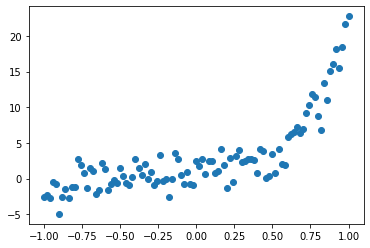

In [5]:
plt.scatter(trX, trY)
plt.show()

In [6]:
X = tf.constant(trX, dtype=tf.float32)
Y = tf.constant(trY, dtype=tf.float32)
w = tf.Variable([0.] * num_coeffs, name='parameters')

In [7]:
model = lambda _X, _w: tf.add_n([tf.multiply(_w[i], tf.pow(_X, i)) for i in range(num_coeffs)])
y_model = lambda: model(X, w)
cost = lambda: tf.pow(Y - y_model(), 2)

In [8]:
train_op = tf.keras.optimizers.SGD(learning_rate, momentum=momentum)

In [9]:
for _ in range(training_epochs):
    step = train_op.minimize(cost, w)
w_val = w.value()

print("Weights after training: \n")
print(w_val.numpy())

Weights after training: 

[0.8695256 1.2847673 3.1272583 5.0690494 5.271491  6.1312737]


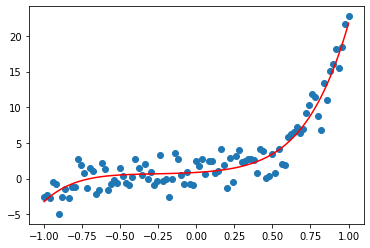

In [10]:
plt.scatter(trX, trY)
trY2 = 0

for i in range(num_coeffs):
    trY2 += w_val[i] * np.power(trX, i)
    
plt.plot(trX, trY2, 'r')
plt.show()